<a href="https://colab.research.google.com/github/JoshuaKadama/Django-crm/blob/main/houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
uploaded_filename = list(uploaded.keys())[0]

Saving uganda_house_prices.csv to uganda_house_prices (1).csv


In [60]:
%matplotlib inline

Creating the DataFrame

In [61]:
hpdf = pd.read_csv(uploaded_filename, header=0, sep=',')
hpdf.head()

,date,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,yr_built,yr_renovated,location,price
0,09/05/2014 00:00,3,2,124.490020,128.577752,3,0,2008,0,Mbarara,"188,000,000"
1,09/05/2014 00:00,4,3,328.876620,14811.525290,2,0,2007,0,Mukono,"400,000,000"
2,09/05/2014 00:00,5,6,675.404810,12078.969350,2,0,2010,0,Mbarara,"1,119,444,000"
3,09/05/2014 00:00,3,2,92.717194,83.984312,2,0,2007,0,Katakwi,"162,000,000"
4,10/05/2014 00:00,5,2,284.283180,651.714545,1,0,1979,0,Mukono,"274,950,000"


In [63]:
hpdf.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot', 'floors',
       'waterfront', 'yr_built', 'yr_renovated', 'location', ' price '],
      dtype='object')

In [74]:
mask = hpdf[' price ']

Check for missing values

In [42]:
hpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          4140 non-null   object 
 1   bedrooms      4140 non-null   int64  
 2   bathrooms     4140 non-null   int64  
 3   sqm_living    4140 non-null   float64
 4   sqm_lot       4140 non-null   float64
 5   floors        4140 non-null   int64  
 6   waterfront    4140 non-null   int64  
 7   yr_built      4140 non-null   int64  
 8   yr_renovated  4140 non-null   int64  
 9   location      4140 non-null   object 
 10   price        4140 non-null   object 
dtypes: float64(2), int64(6), object(3)
memory usage: 355.9+ KB


In [44]:
hpdf.isnull().sum()

,0
date,0
bedrooms,0
bathrooms,0
sqm_living,0
sqm_lot,0
floors,0
waterfront,0
yr_built,0
yr_renovated,0
location,0


In [49]:
# check for data types
(hpdf.dtypes)


,0
date,object
bedrooms,int64
bathrooms,int64
sqm_living,float64
sqm_lot,float64
floors,int64
waterfront,int64
yr_built,int64
yr_renovated,int64
location,object


In [79]:
# for numeric columns
hpdf.describe()


,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,yr_built,yr_renovated
count,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,3.400483,1.790821,199.150484,1365.454678,1.462077,0.007488,1970.814010,808.368357
std,0.903939,0.750107,88.952915,3333.065892,0.549780,0.086219,29.807941,979.380535
min,0.000000,0.000000,34.374110,59.272114,1.000000,0.000000,1900.000000,0.000000
25%,3.000000,1.000000,136.567410,464.515000,1.000000,0.000000,1951.000000,0.000000
50%,3.000000,2.000000,183.947940,713.123428,1.000000,0.000000,1976.000000,0.000000
75%,4.000000,2.000000,243.405860,1021.933000,2.000000,0.000000,1997.000000,1999.000000
max,8.000000,6.000000,932.746120,99798.074850,3.000000,1.000000,2014.000000,2014.000000


In [80]:
hpdf.var(numeric_only=True)

,0
bedrooms,8.171053e-01
bathrooms,5.626604e-01
sqm_living,7.912621e+03
sqm_lot,1.110933e+07
floors,3.022581e-01
waterfront,7.433649e-03
yr_built,8.885134e+02
yr_renovated,9.591862e+05


One Hot encoding

In [92]:
hpdf2 = pd.get_dummies(hpdf, columns = ['location'], drop_first=False)
hpdf2

,date,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,yr_built,yr_renovated,price,location_Kabale,location_Katakwi,location_Mbarara,location_Mukono,location_Muni
0,09/05/2014 00:00,3,2,124.490020,128.577752,3,0,2008,0,"188,000,000",False,False,True,False,False
1,09/05/2014 00:00,4,3,328.876620,14811.525290,2,0,2007,0,"400,000,000",False,False,False,True,False
2,09/05/2014 00:00,5,6,675.404810,12078.969350,2,0,2010,0,"1,119,444,000",False,False,True,False,False
3,09/05/2014 00:00,3,2,92.717194,83.984312,2,0,2007,0,"162,000,000",False,True,False,False,False
4,10/05/2014 00:00,5,2,284.283180,651.714545,1,0,1979,0,"274,950,000",False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,09/07/2014 00:00,3,1,140.283530,590.863080,1,0,1954,1979,"154,083,333",False,True,False,False,False
4136,09/07/2014 00:00,3,2,135.638380,703.554419,2,0,1983,2009,"267,166,667",False,False,False,False,True
4137,09/07/2014 00:00,3,2,279.638030,651.621642,2,0,2009,0,"208,452,083",False,False,False,False,True
4138,10/07/2014 00:00,4,2,194.167270,615.946890,1,0,1974,0,"101,700,000",False,False,False,False,True


In [93]:
hpdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              4140 non-null   object 
 1   bedrooms          4140 non-null   int64  
 2   bathrooms         4140 non-null   int64  
 3   sqm_living        4140 non-null   float64
 4   sqm_lot           4140 non-null   float64
 5   floors            4140 non-null   int64  
 6   waterfront        4140 non-null   int64  
 7   yr_built          4140 non-null   int64  
 8   yr_renovated      4140 non-null   int64  
 9    price            4140 non-null   object 
 10  location_Kabale   4140 non-null   bool   
 11  location_Katakwi  4140 non-null   bool   
 12  location_Mbarara  4140 non-null   bool   
 13  location_Mukono   4140 non-null   bool   
 14  location_Muni     4140 non-null   bool   
dtypes: bool(5), float64(2), int64(6), object(2)
memory usage: 343.8+ KB


Correlation matrix

In [96]:
corr_matrix = hpdf.corr(numeric_only=True)
corr_matrix

,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,yr_built,yr_renovated
bedrooms,1.000000,0.497361,0.590110,0.065747,0.161344,-0.001286,0.153514,-0.069439
bathrooms,0.497361,1.000000,0.710143,0.098939,0.465850,0.076526,0.402303,-0.191066
sqm_living,0.590110,0.710143,1.000000,0.194226,0.343090,0.126157,0.296545,-0.124646
sqm_lot,0.065747,0.098939,0.194226,1.000000,-0.008329,0.019229,0.047224,-0.020308
floors,0.161344,0.465850,0.343090,-0.008329,1.000000,0.018735,0.562897,-0.247931
waterfront,-0.001286,0.076526,0.126157,0.019229,0.018735,1.000000,-0.031891,0.014030
yr_built,0.153514,0.402303,0.296545,0.047224,0.562897,-0.031891,1.000000,-0.321915
yr_renovated,-0.069439,-0.191066,-0.124646,-0.020308,-0.247931,0.014030,-0.321915,1.000000


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

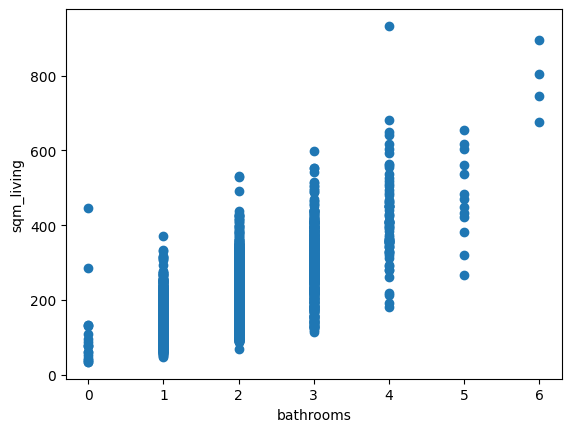

In [105]:
# graph one scatter between high correlated data
x_axis = hpdf['bathrooms']
y_axis = hpdf['sqm_living']
plt.scatter(x_axis, y_axis)
plt.xlabel('bathrooms')
plt.ylabel('sqm_living')
plt.show()


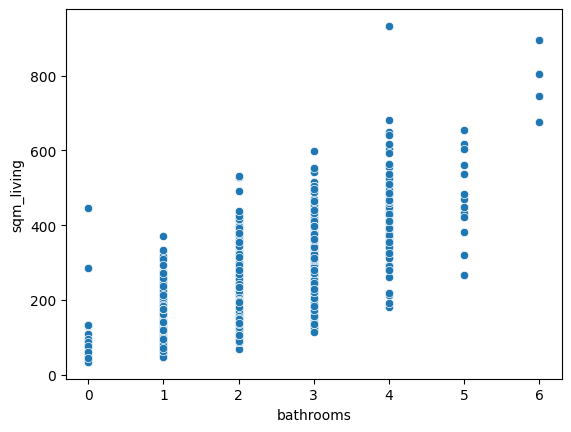

In [104]:
scatt_g = sns.scatterplot(x=x_axis, y=y_axis)
scatt_g.set_xlabel('bathrooms')
scatt_g.set_ylabel('sqm_living')
plt.show()

<Axes: xlabel='bathrooms', ylabel='sqm_living'>

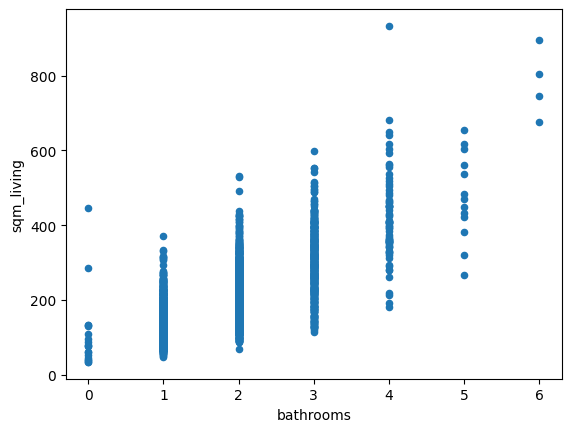

In [103]:
hpdf.plot(kind='scatter', x='bathrooms', y='sqm_living')

For second graph

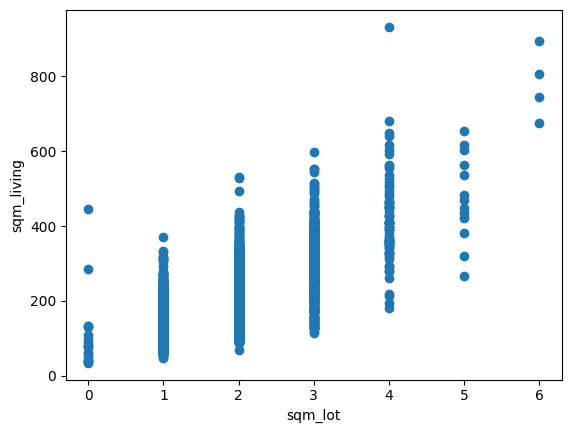

In [106]:
# graph two scatter between high correlated data
x_axis = hpdf['bathrooms']
y_axis = hpdf['sqm_living']
plt.scatter(x_axis, y_axis)
plt.xlabel('sqm_lot')
plt.ylabel('sqm_living')
plt.show()
